In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df =  pd.read_csv("/content/sample_data/CHDdata.csv")

In [5]:
df.shape

(462, 10)

In [6]:
df.head(5)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [27]:
df['chd'].nunique()

2

In [12]:
df.replace({'famhist':{'Present':1, 'Absent':0}}, inplace=True)

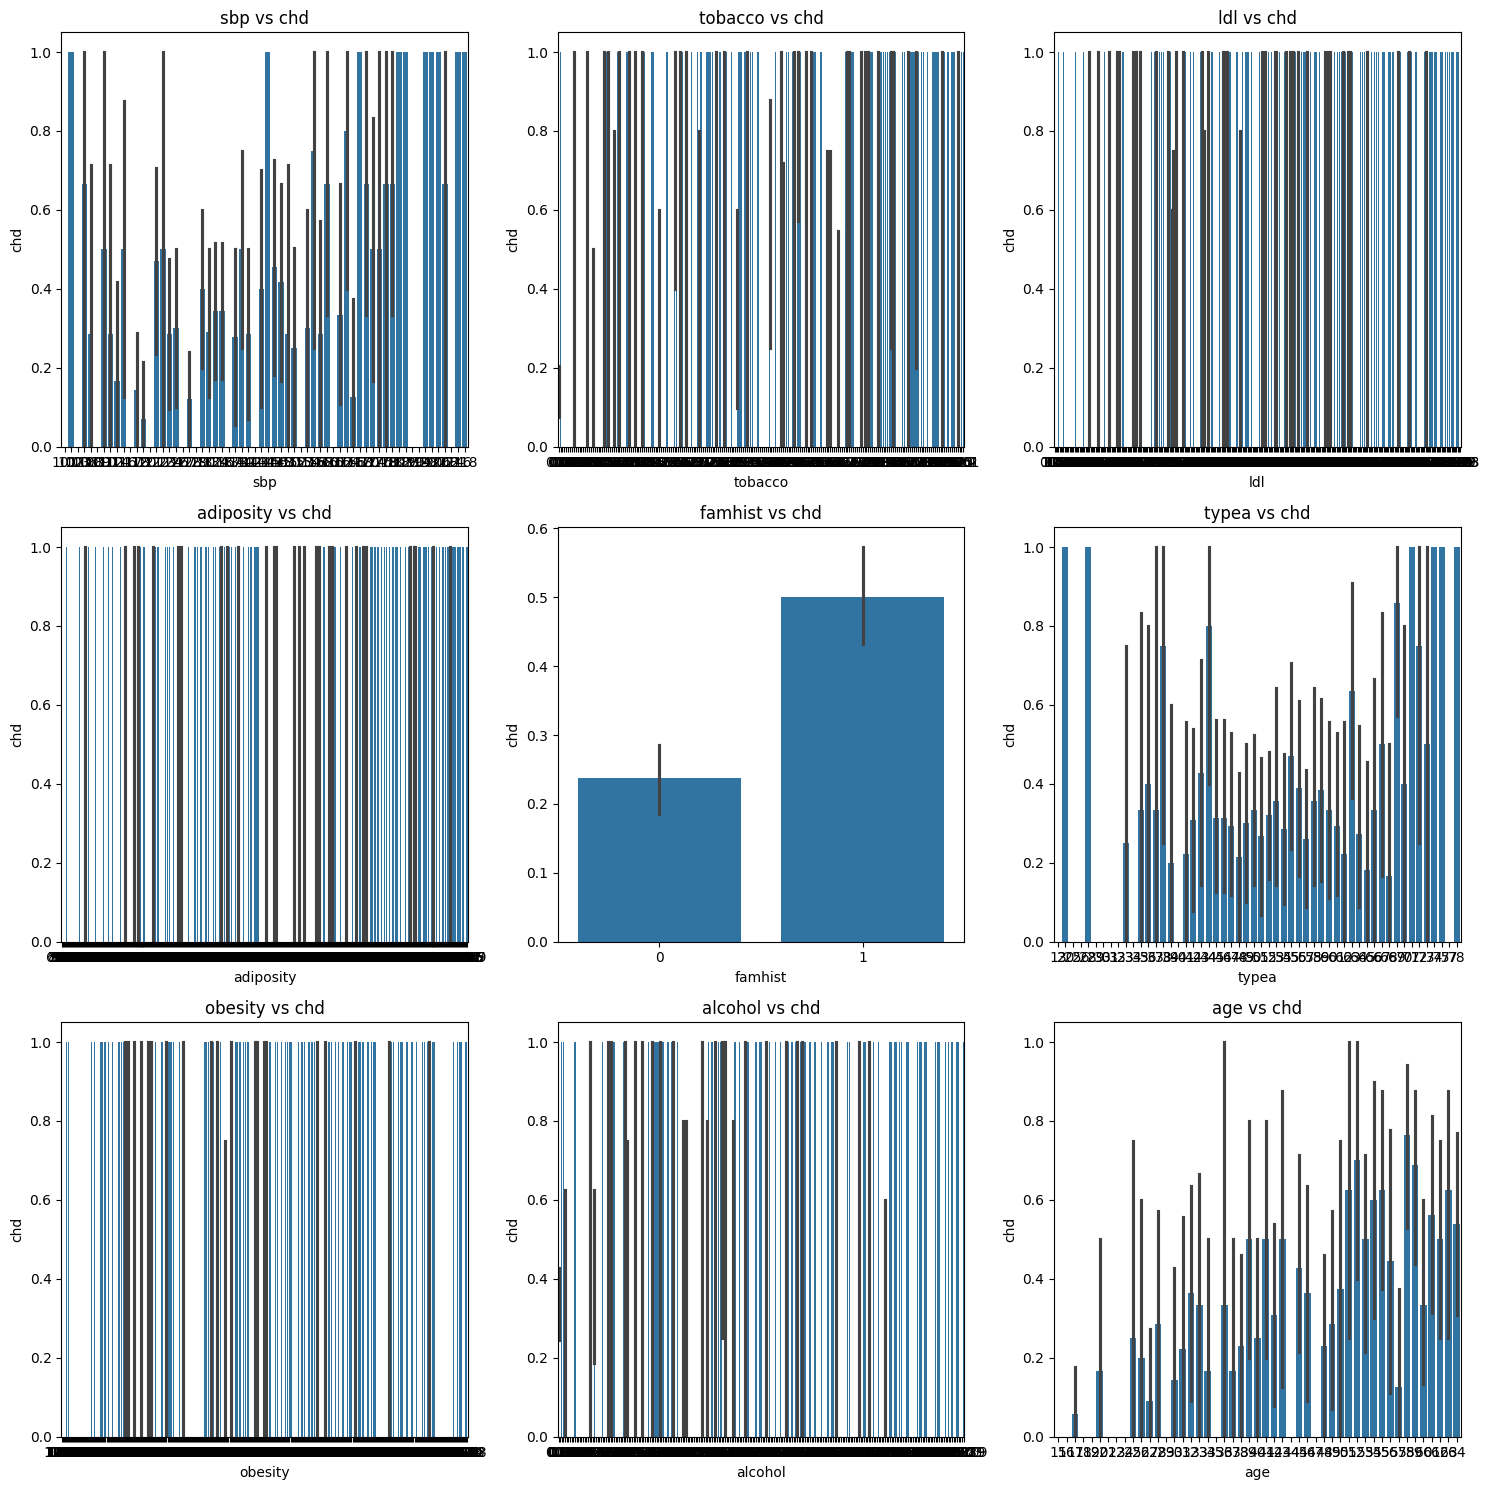

In [26]:
features = ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']

plt.figure(figsize=(15, 15))

for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.barplot(x=col, y='chd', data=df)
    plt.title(f'{col} vs chd')

plt.tight_layout()
plt.show()


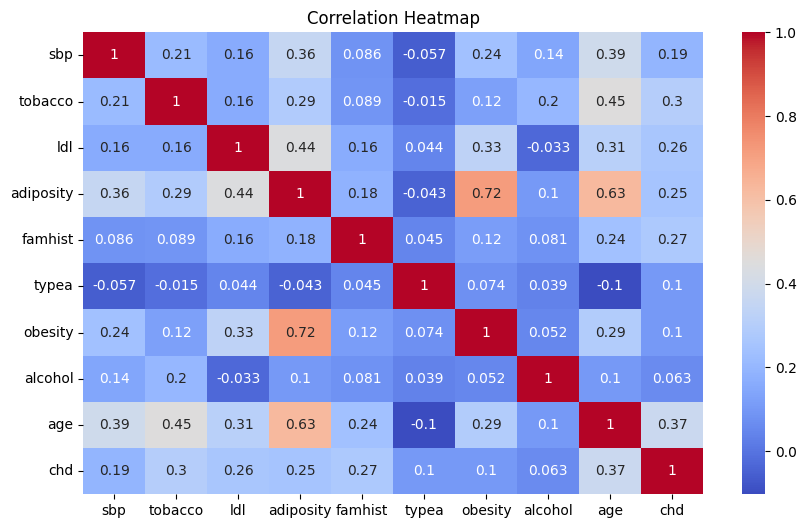

In [28]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
df.drop(columns=['adiposity'],inplace=True)

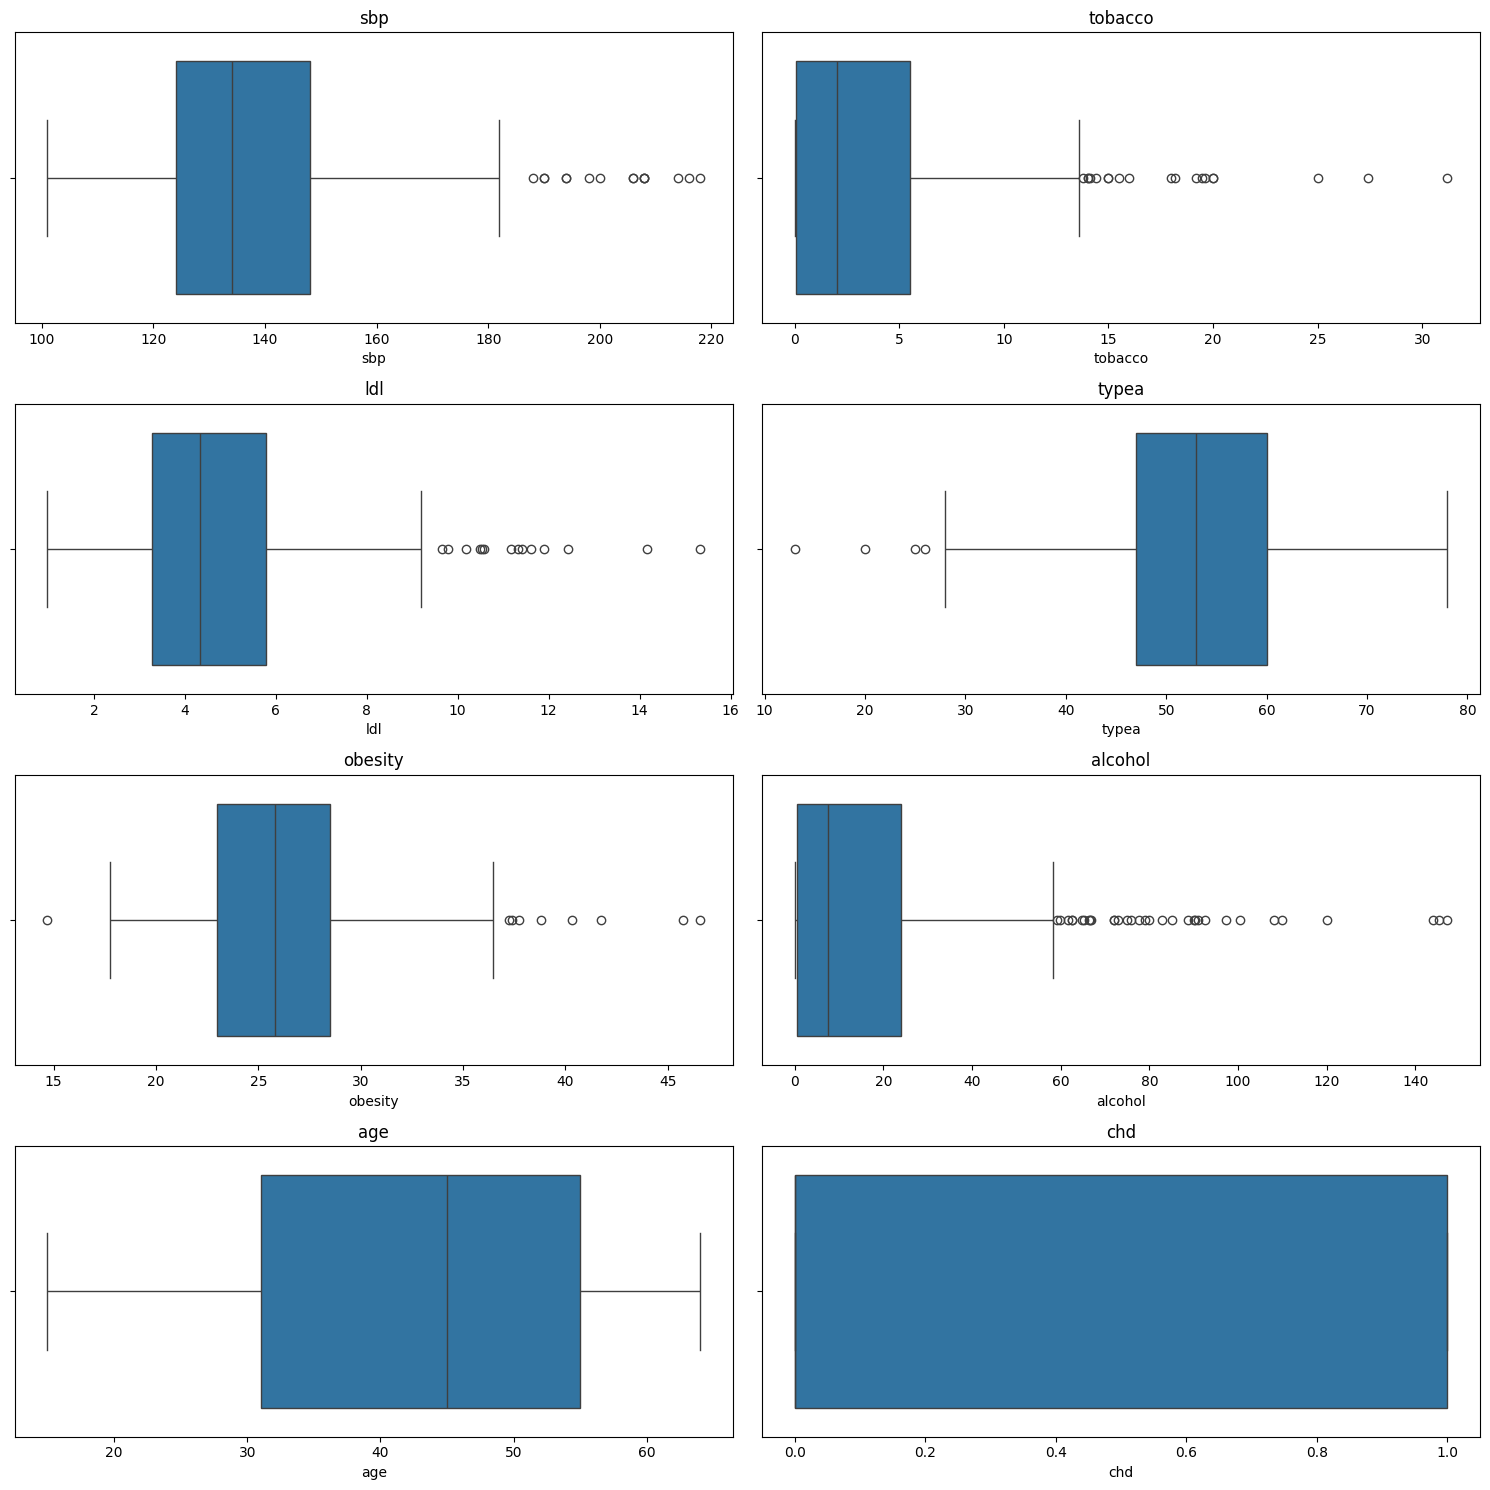

In [35]:
features = ['sbp', 'tobacco', 'ldl', 'typea', 'obesity', 'alcohol', 'age', 'chd']

plt.figure(figsize=(15, 15))

for i, col in enumerate(features):
    plt.subplot(4,2, i + 1)
    sns.boxplot(x=col,data=df)
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

In [50]:
df.drop(df[df['sbp'] > 179.8].index, inplace=True)
df.drop(df[df['tobacco'] > 11.6].index, inplace=True)
df.drop(df[df['ldl'] > 8.6].index, inplace=True)
df.drop(df[(df['obesity'] > 35.5) & (df['obesity'] < 14)].index, inplace=True)
df.drop(df[df['alcohol'] > 32].index, inplace=True)
df.drop(df[df['typea'] < 29.8].index, inplace=True)


In [51]:
df.shape

(325, 9)

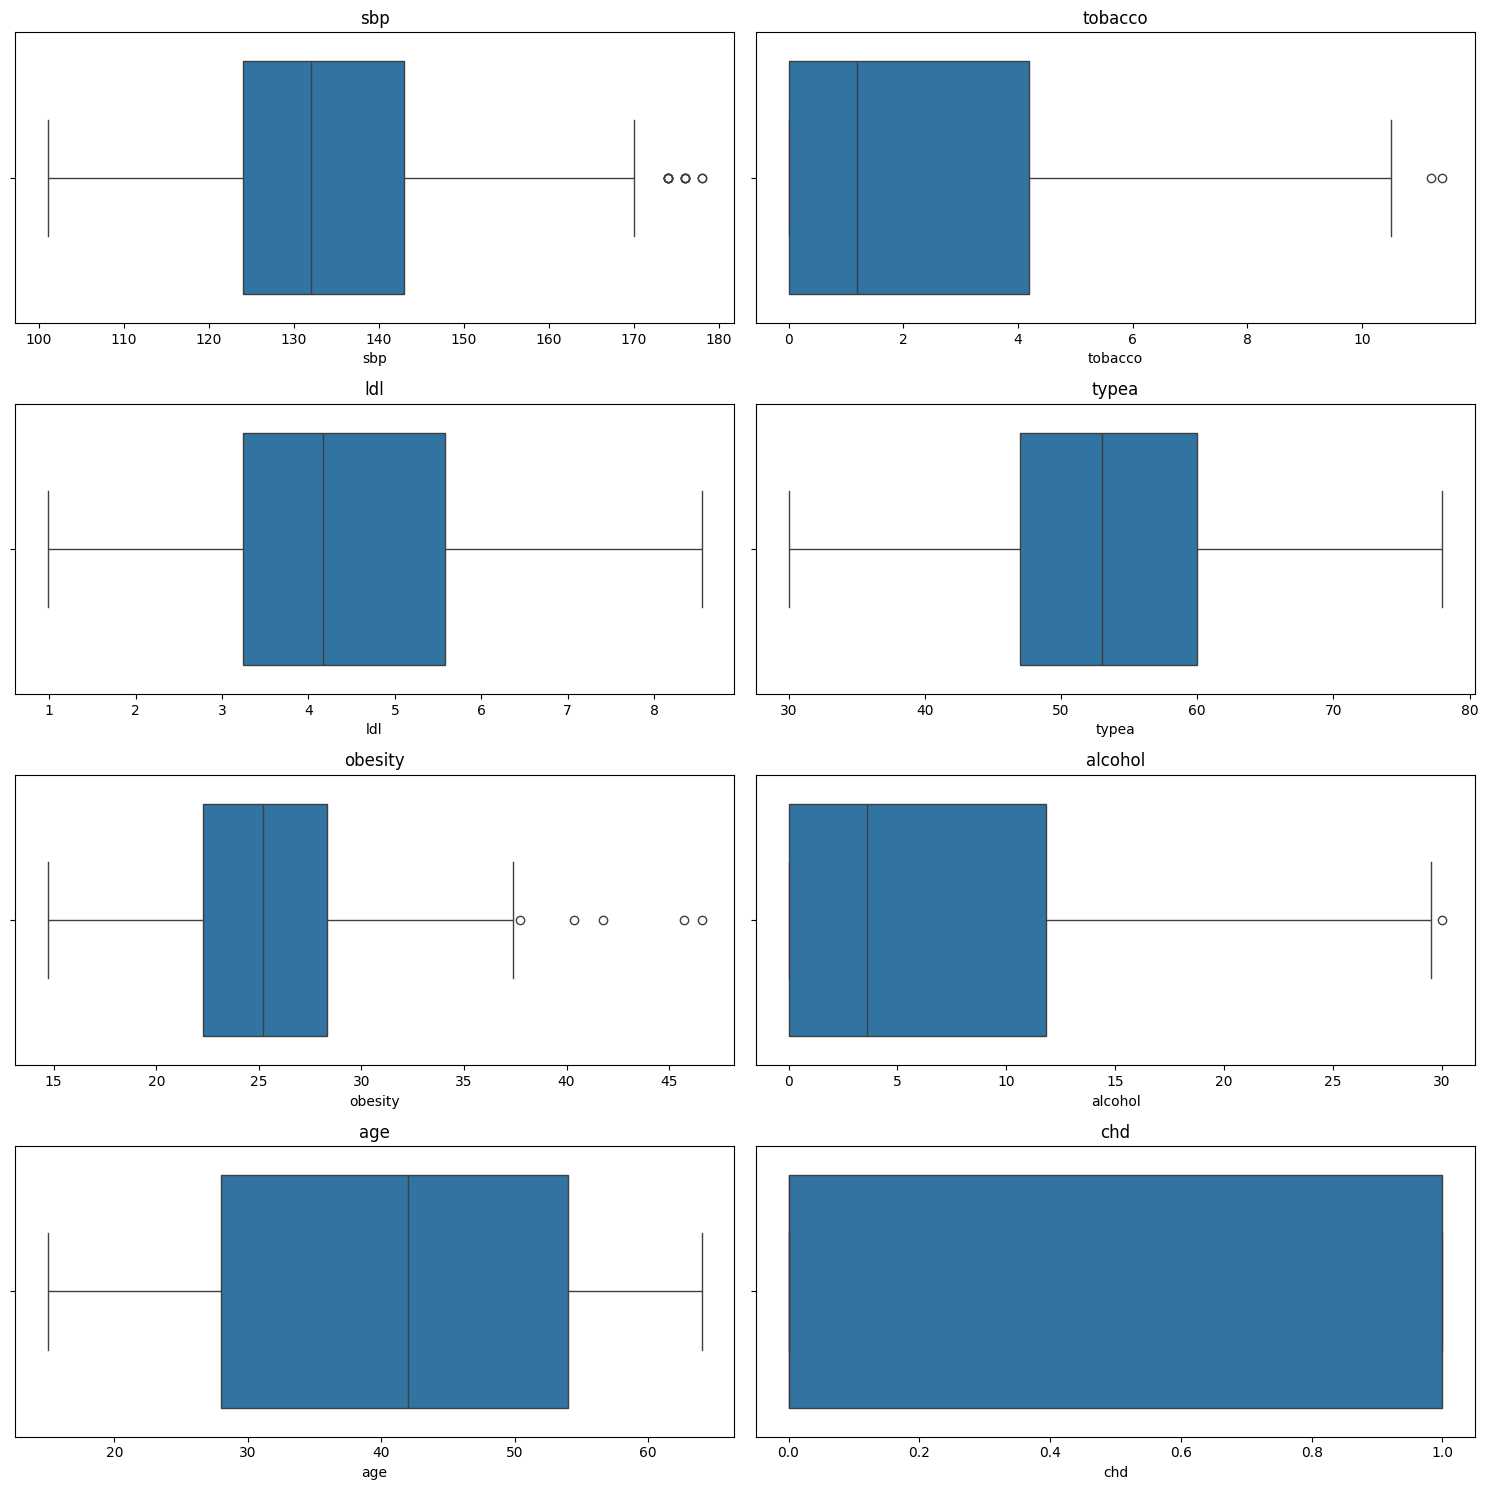

In [52]:

features = ['sbp', 'tobacco', 'ldl', 'typea', 'obesity', 'alcohol', 'age', 'chd']

plt.figure(figsize=(15, 15))

for i, col in enumerate(features):
    plt.subplot(4,2, i + 1)
    sns.boxplot(x=col,data=df)
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

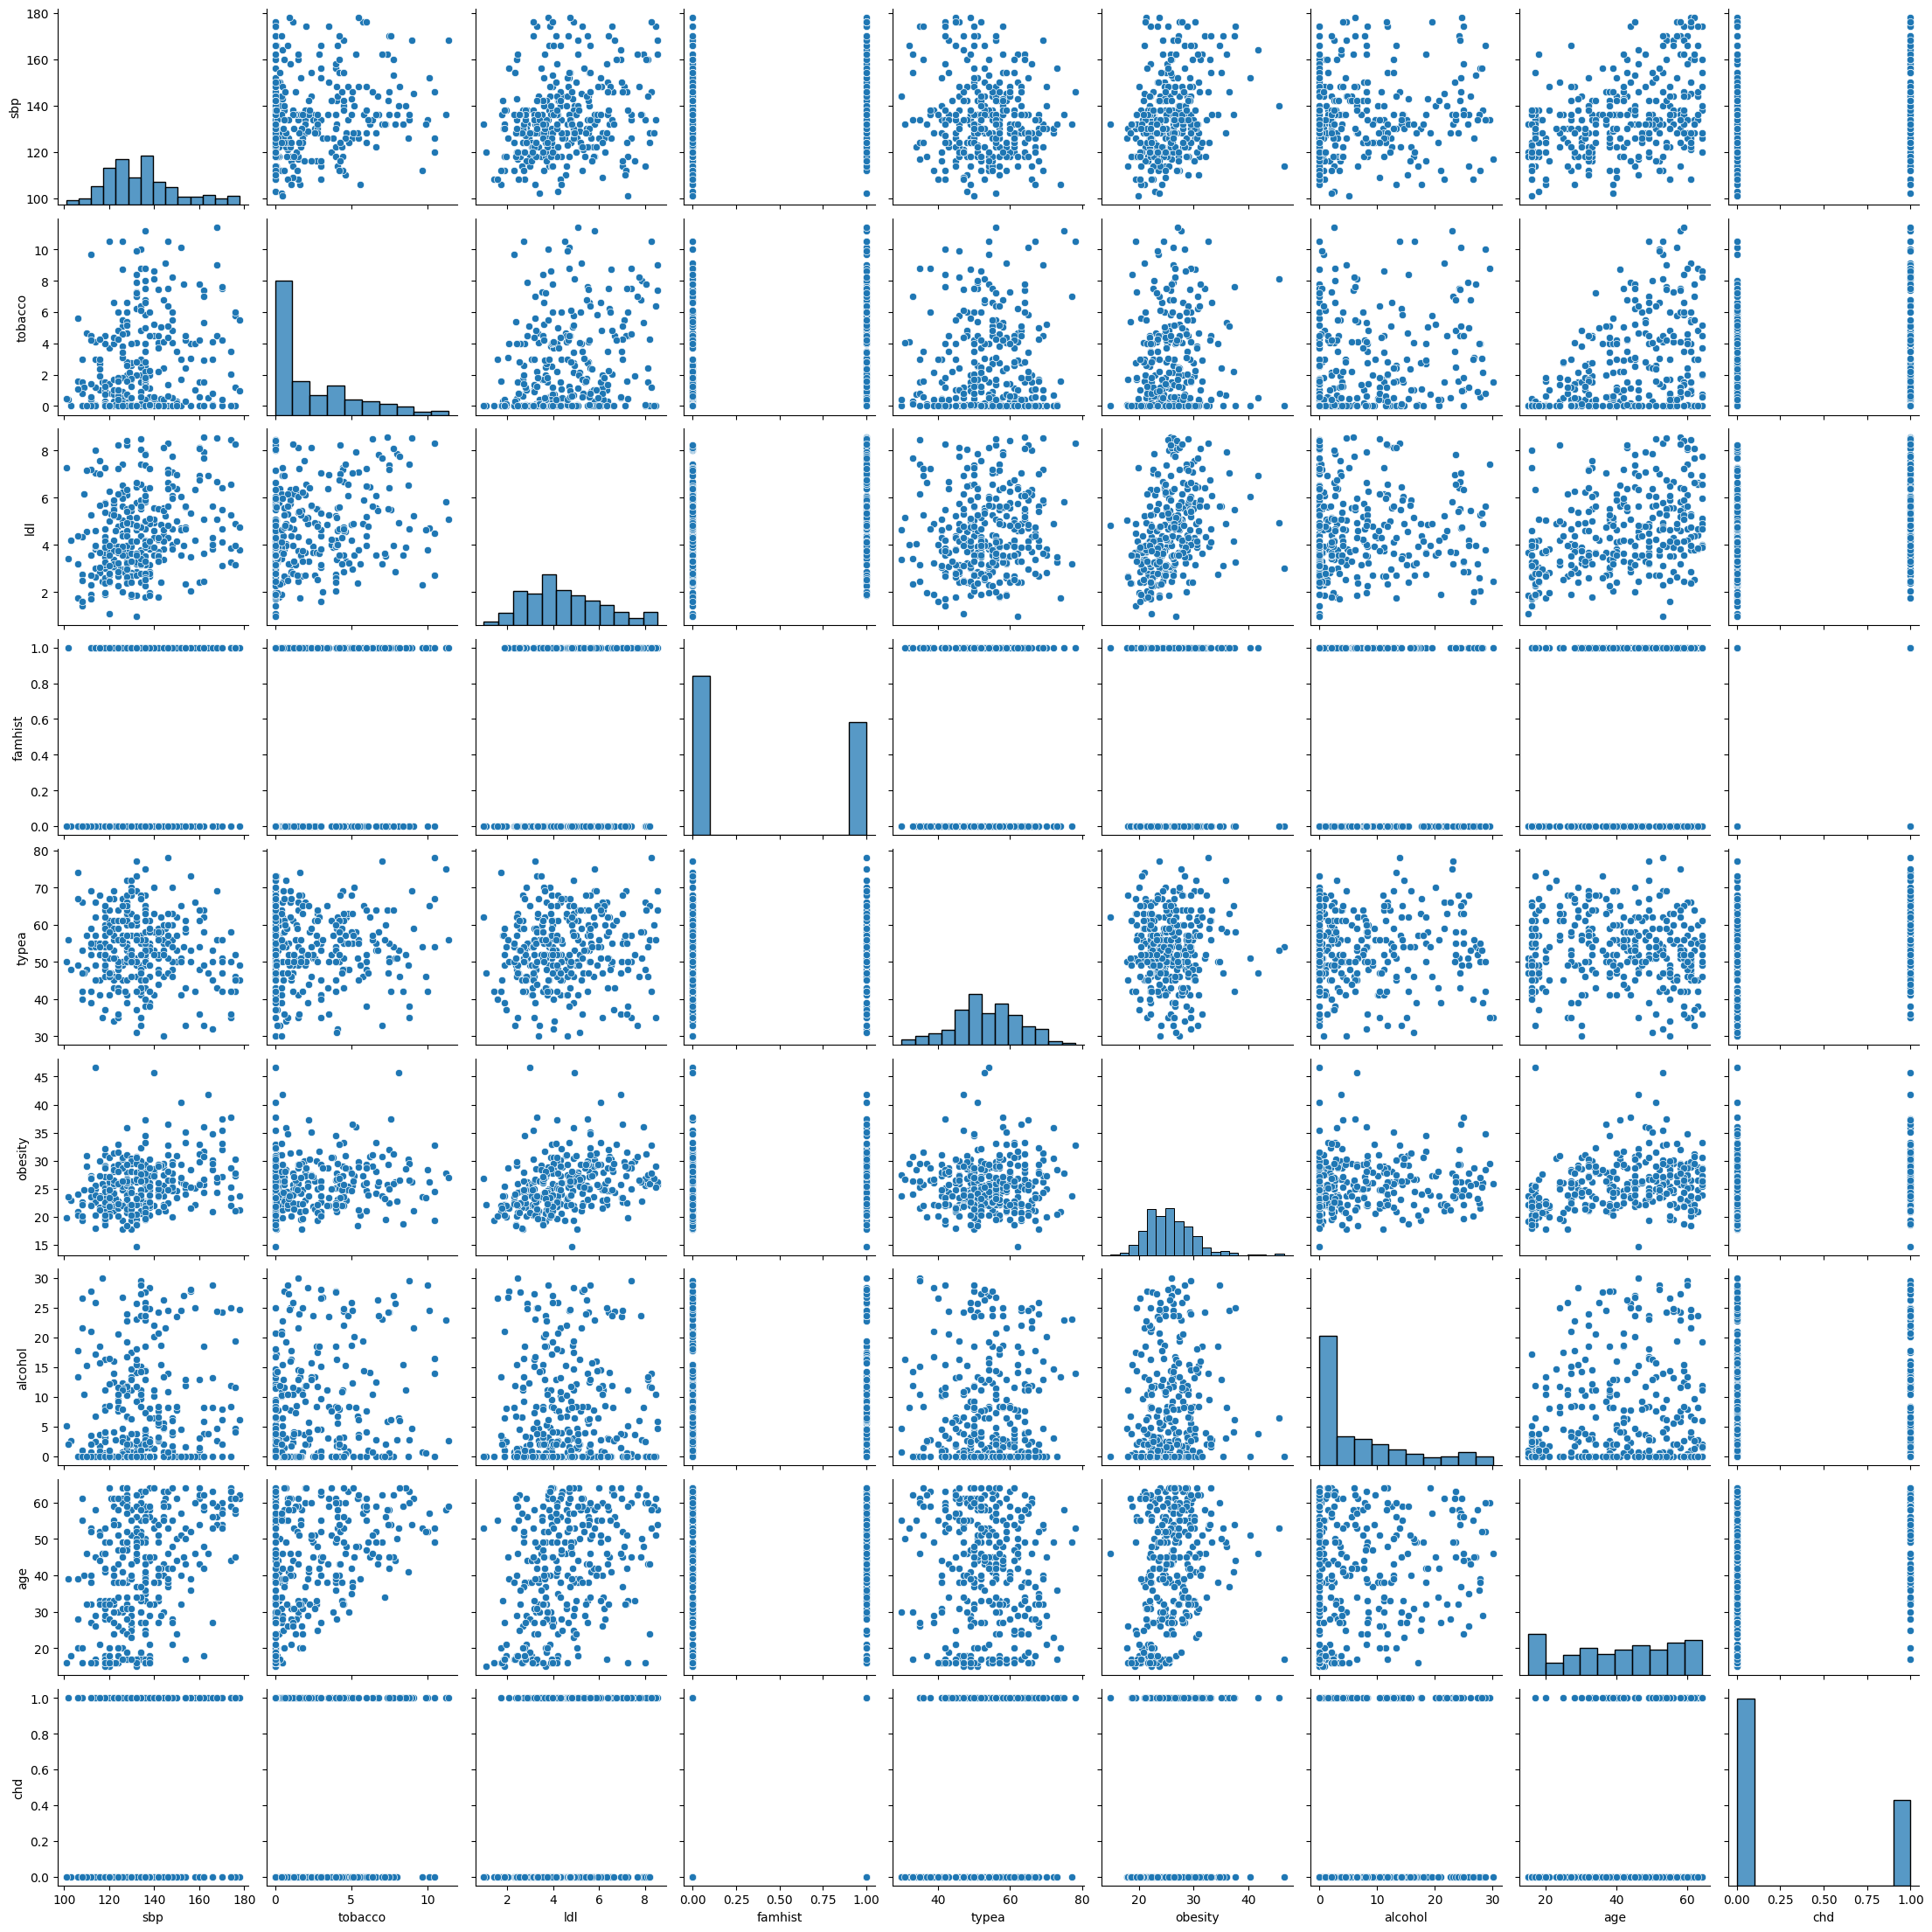

In [53]:
sns.pairplot(df, hue=None, diag_kind='hist', markers='o', plot_kws=None, height=2.5)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(columns=['chd']),df['chd'], test_size=0.2, random_state=42)

In [65]:
Y_test.dtype

dtype('int64')

In [56]:

le = LogisticRegression()
le.fit(X_train,Y_train)

LogisticRegression()

In [66]:
from sklearn.metrics import accuracy_score
y_preds = le.predict(X_test)
accuracy_score = accuracy_score(Y_test,y_preds)
print(accuracy_score)

0.7538461538461538


In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  # Import the function

pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])
pipe.fit(X_train, Y_train)
y_predict = pipe.predict(X_test)
accuracy = accuracy_score(Y_test, y_predict)
print(accuracy)


0.7538461538461538


In [73]:
from sklearn.preprocessing import StandardScaler as scaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
pipe = Pipeline([('scaler', scaler()), ('model', SVC())])
pipe.fit(X_train, Y_train)
y_predict = pipe.predict(X_test)
accuracy = accuracy_score(Y_test, y_predict)
print(accuracy)

0.7384615384615385


In [74]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

model = SVC()
model.fit(X_train, Y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_predict)
print(accuracy)

0.7230769230769231


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['svc', 'linear'],
    'gamma': ['scale', 'auto']
}
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
from sklearn.model_selection import train_test_split

grid_search.fit(X_train, Y_train)

# Print the best parameters and accuracy score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

Best parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.7153846153846153
